In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,None
2,3,M,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68.0,7000,Sleep Apnea
372,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68.0,7000,Sleep Apnea
373,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68.0,7000,Sleep Apnea
374,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68.0,7000,Sleep Apnea


In [82]:
df.info() #There're 4 columns with NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                376 non-null    int64  
 1   Gender                   376 non-null    object 
 2   Age                      376 non-null    int64  
 3   Occupation               376 non-null    object 
 4   Sleep Duration           376 non-null    float64
 5   Quality of Sleep         376 non-null    int64  
 6   Physical Activity Level  376 non-null    int64  
 7   Stress Level             376 non-null    int64  
 8   BMI Category             370 non-null    object 
 9   Blood Pressure           375 non-null    object 
 10  Heart Rate               375 non-null    float64
 11  Daily Steps              376 non-null    int64  
 12  Sleep Disorder           373 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 38.3+ KB


In [83]:
df_num = df.select_dtypes(include=["int64","float64"])
df_num.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,1,27,6.1,6,42,6,77.0,4200
1,2,28,6.2,6,60,8,75.0,10000
2,3,28,6.2,6,60,8,75.0,10000
3,4,28,5.9,4,30,8,85.0,3000
4,5,28,5.9,4,30,8,85.0,3000


In [84]:
df_char= df.select_dtypes(include=["object"])
df_char.head()

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,Male,Software Engineer,Overweight,126/83,None
1,Male,Doctor,Normal,125/80,None
2,M,Doctor,Normal,125/80,None
3,Male,Sales Representative,Obese,140/90,Sleep Apnea
4,Male,Sales Representative,Obese,140/90,Sleep Apnea


# Data Visualization Before Cleaning

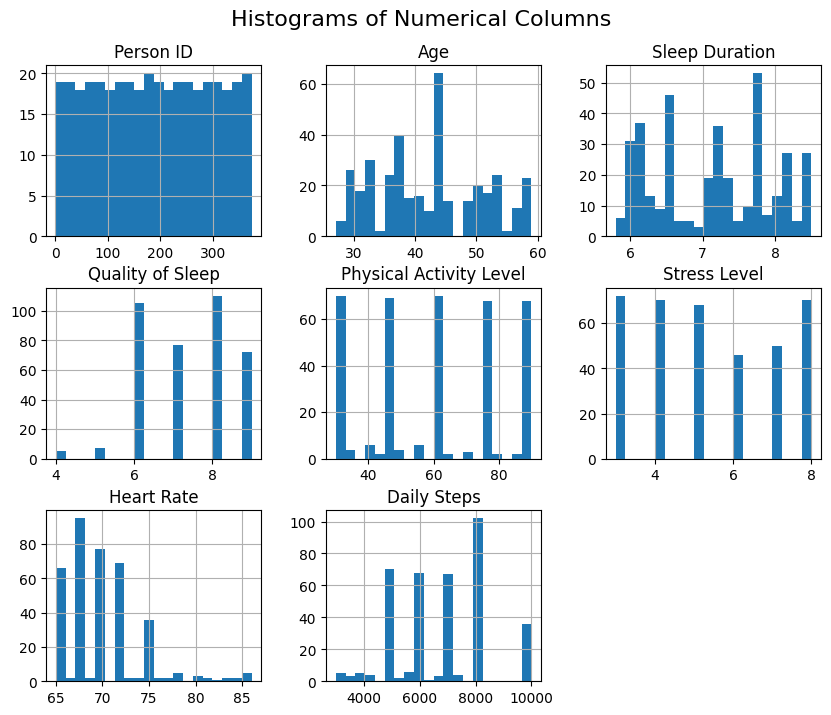

In [85]:
df_num.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms of Numerical Columns', y=0.95, fontsize=16)
plt.show()

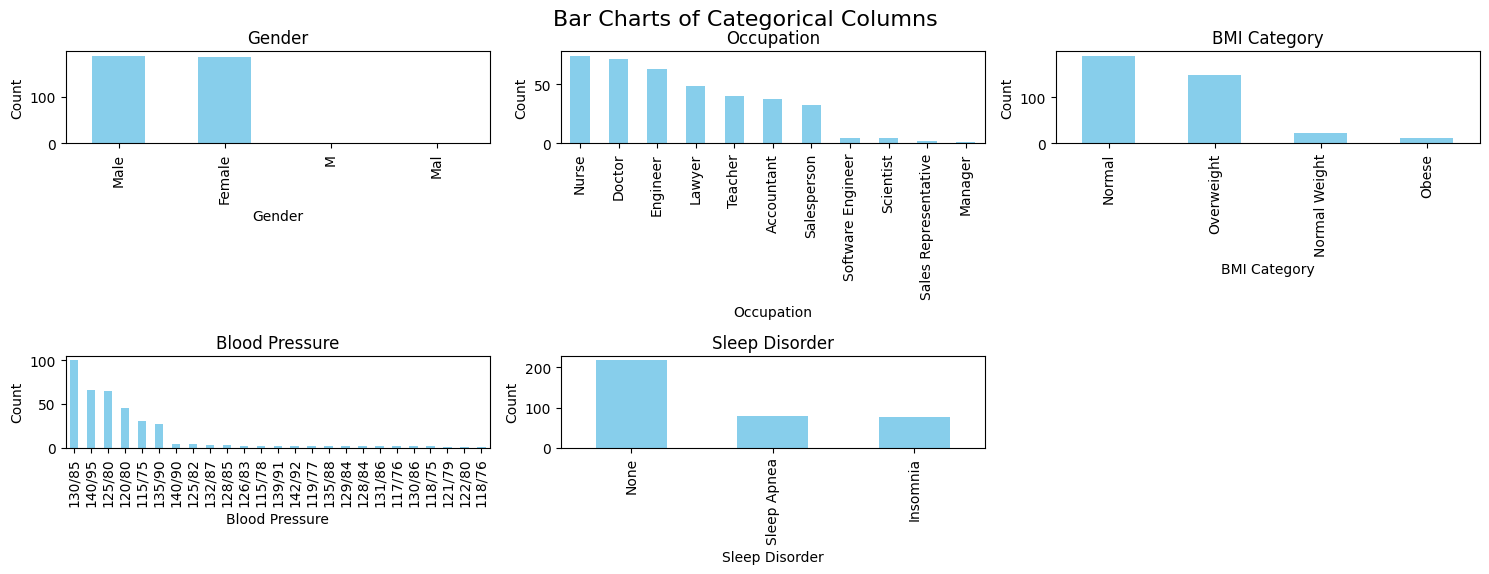

In [86]:
import math
columns_per_row = 3
rows = 2
num_columns = len(df_char.columns)

#subplots
fig, axes = plt.subplots(nrows=rows, ncols=columns_per_row, figsize=(15, 6))

axes = axes.flatten()
for i, column in enumerate(df_char.columns):
    df_char[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

for i in range(num_columns, rows * columns_per_row):
    fig.delaxes(axes[i])

plt.suptitle('Bar Charts of Categorical Columns', y=0.95, fontsize=16)
plt.tight_layout()
plt.show()

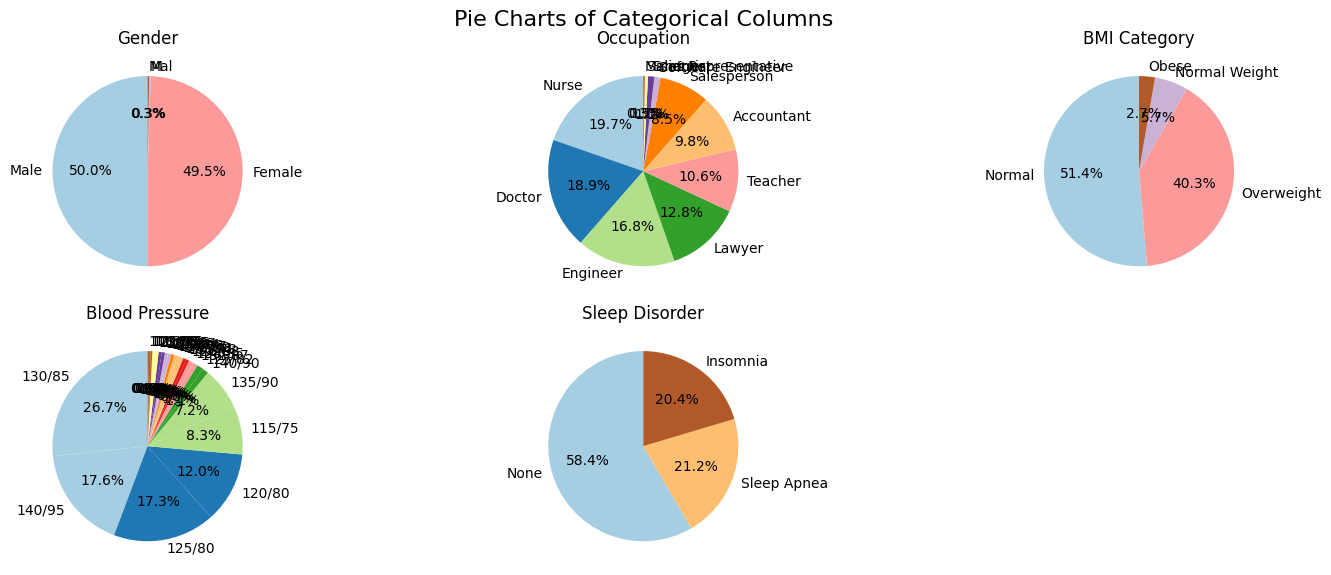

In [87]:
columns_per_row = 3
rows = 2
num_columns = len(df_char.columns)

#subplots
fig, axes = plt.subplots(nrows=rows, ncols=columns_per_row, figsize=(15, 6))

axes = axes.flatten()
for i, column in enumerate(df_char.columns):
    #occurrences of each category
    category_counts = df_char[column].value_counts()

    #pie chart
    category_counts.plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90, colormap='Paired')
    axes[i].set_title(f'{column}')
    axes[i].set_ylabel('')  # Remove the y-axis label

for i in range(num_columns, rows * columns_per_row):
    fig.delaxes(axes[i])

plt.suptitle('Pie Charts of Categorical Columns', y=0.95, fontsize=16)
plt.tight_layout()
plt.show()

### DATA CLEANING

In [88]:
duplicated_data = df[df.duplicated()]
duplicated_data # There're 2 rows with identical values for each variable

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
179,179,Male,42,Lawyer,7.8,8,90,5,Normal,130/85,70.0,8000,None
370,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68.0,7000,Sleep Apnea


In [89]:
duplicated_data = df.duplicated().sum()
duplicated_data

2

In [90]:
#Removing redundant columns
df = df.drop(index = [179,370])
df.shape #baris dari 376 -> 374

(374, 13)

In [91]:
#Ensuring the redundancy update
duplicated_data = df[df.duplicated()]
duplicated_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


In [92]:
#removing unnecessary columns
df = df.drop(columns="Person ID")
df.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,None
2,M,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea


In [93]:
#Filling in the NULL data
df['BMI Category'] = df['BMI Category'].fillna(df['BMI Category'].mode()[0])
df['Blood Pressure'] = df['Blood Pressure'].fillna(df['Blood Pressure'].mode()[0])
df['Heart Rate'] = df['Heart Rate'].fillna(df['Heart Rate'].mean())
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 375
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    float64
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 38.0+ KB


In [94]:
col_char = df.select_dtypes(include="object")
unique_values = [col_char[col].value_counts() for col in col_char.columns]
unique_values #There's a slight typo in 'gender' (M, Mal)

[Male      187
 Female    185
 M           1
 Mal         1
 Name: Gender, dtype: int64,
 Nurse                   73
 Doctor                  71
 Engineer                63
 Lawyer                  47
 Teacher                 40
 Accountant              37
 Salesperson             32
 Software Engineer        4
 Scientist                4
 Sales Representative     2
 Manager                  1
 Name: Occupation, dtype: int64,
 Normal           195
 Overweight       148
 Normal Weight     21
 Obese             10
 Name: BMI Category, dtype: int64,
 130/85    100
 140/95     65
 125/80     65
 120/80     45
 115/75     31
 135/90     27
 140/90      4
 125/82      4
 132/87      3
 128/85      3
 126/83      2
 115/78      2
 139/91      2
 142/92      2
 119/77      2
 135/88      2
 129/84      2
 128/84      2
 131/86      2
 117/76      2
 130/86      2
 118/75      2
 121/79      1
 122/80      1
 118/76      1
 Name: Blood Pressure, dtype: int64,
 None           220
 Sleep Apnea   

In [95]:
#Fixing typo in the data
df['Gender'].replace("M","Male", inplace=True)
df['Gender'].replace("Mal","Male", inplace=True)
df['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [96]:
#Splitting blood pressure into 2 new numeric columns.
df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = df['Blood Pressure'].str.split('/',expand=True)
df['Systolic Blood Pressure'] = pd.to_numeric(df['Systolic Blood Pressure'])
df['Diastolic Blood Pressure'] = pd.to_numeric(df['Diastolic Blood Pressure'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea,140,90


In [97]:
#Droping the "Blood Pressure" column
df = df.drop(columns="Blood Pressure")
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85.0,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85.0,3000,Sleep Apnea,140,90


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 375
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    374 non-null    object 
 1   Age                       374 non-null    int64  
 2   Occupation                374 non-null    object 
 3   Sleep Duration            374 non-null    float64
 4   Quality of Sleep          374 non-null    int64  
 5   Physical Activity Level   374 non-null    int64  
 6   Stress Level              374 non-null    int64  
 7   BMI Category              374 non-null    object 
 8   Heart Rate                374 non-null    float64
 9   Daily Steps               374 non-null    int64  
 10  Sleep Disorder            374 non-null    object 
 11  Systolic Blood Pressure   374 non-null    int64  
 12  Diastolic Blood Pressure  374 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 40.9+ KB


Check outlier numerical data

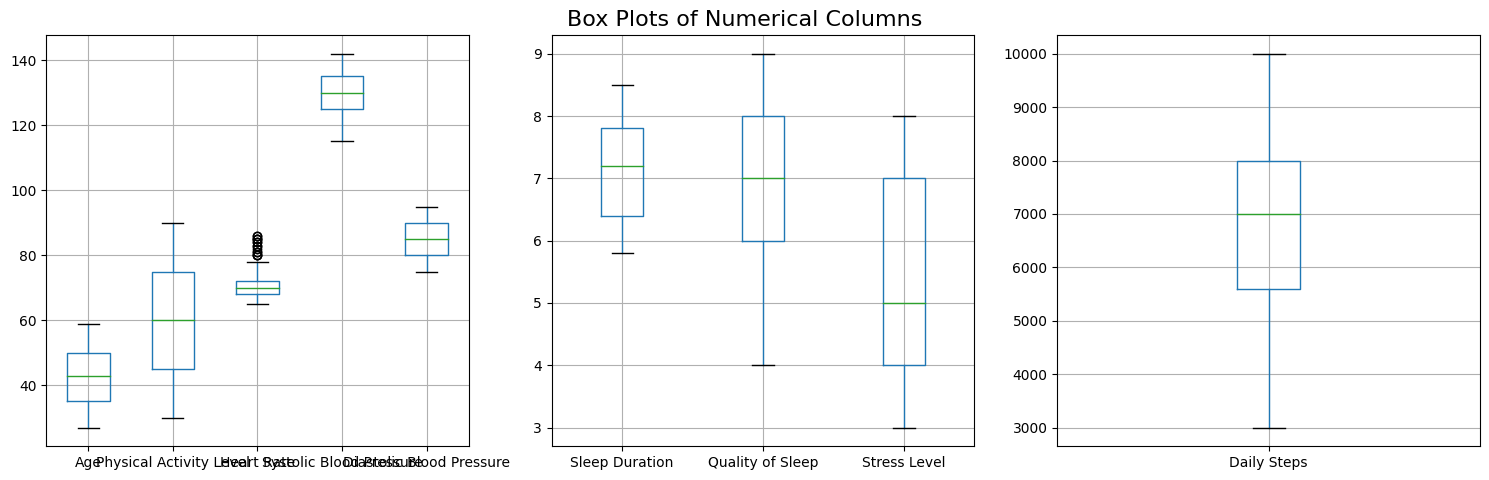

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df.boxplot(column=['Age', 'Physical Activity Level', 'Heart Rate', 'Systolic Blood Pressure', 'Diastolic Blood Pressure'], ax=axes[0])

df.boxplot(column=['Sleep Duration', 'Quality of Sleep', 'Stress Level'], ax=axes[1])

df.boxplot(column=['Daily Steps'], ax=axes[2])

plt.suptitle('Box Plots of Numerical Columns', y=0.95, fontsize=16)
plt.tight_layout()
plt.show()

<Axes: >

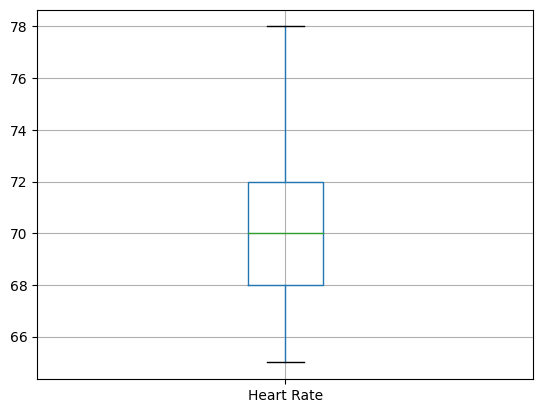

In [100]:
#Truncation
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1

df['Heart Rate'] = np.where(df['Heart Rate'] > Q3 + 1.5 * IQR, Q3 + 1.5 * IQR, df['Heart Rate'])
df['Heart Rate'] = np.where(df['Heart Rate'] < Q1 - 1.5 * IQR, Q1 - 1.5 * IQR, df['Heart Rate'])

df.boxplot(column=['Heart Rate'])

In [101]:
df_num = df.select_dtypes(include=["int64","float64"])
df_num.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Blood Pressure,Diastolic Blood Pressure
0,27,6.1,6,42,6,77.0,4200,126,83
1,28,6.2,6,60,8,75.0,10000,125,80
2,28,6.2,6,60,8,75.0,10000,125,80
3,28,5.9,4,30,8,78.0,3000,140,90
4,28,5.9,4,30,8,78.0,3000,140,90


In [102]:
df_char = df.select_dtypes(include="object")
df_char.head()

,Gender,Occupation,BMI Category,Sleep Disorder
0,Male,Software Engineer,Overweight,None
1,Male,Doctor,Normal,None
2,Male,Doctor,Normal,None
3,Male,Sales Representative,Obese,Sleep Apnea
4,Male,Sales Representative,Obese,Sleep Apnea


# Data Visualization After Cleaning

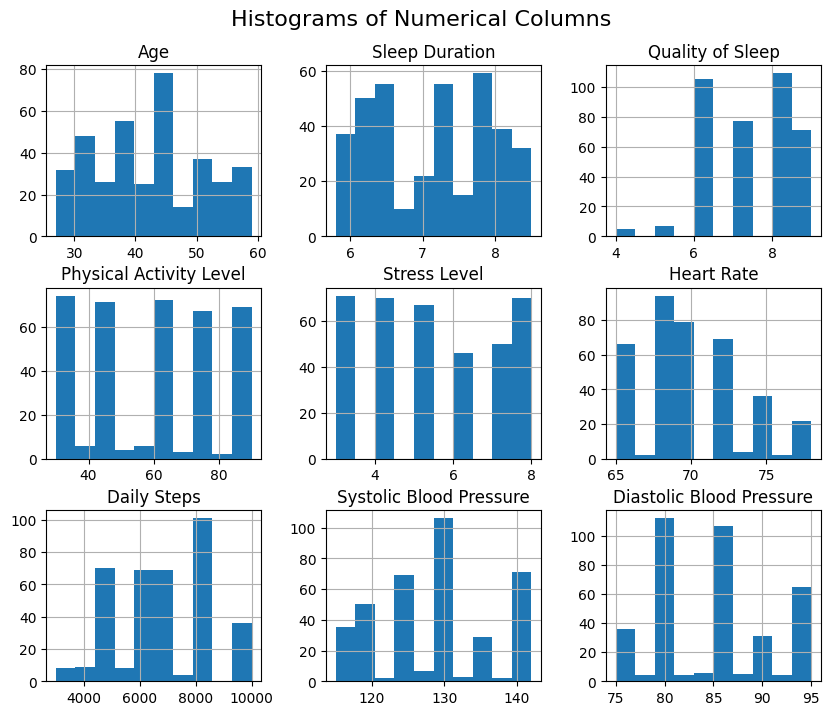

In [103]:
#histogram to know the distributions of numeric features
df_num.hist(figsize=(10, 8), bins=10)
plt.suptitle('Histograms of Numerical Columns', y=0.95, fontsize=16)
plt.show()

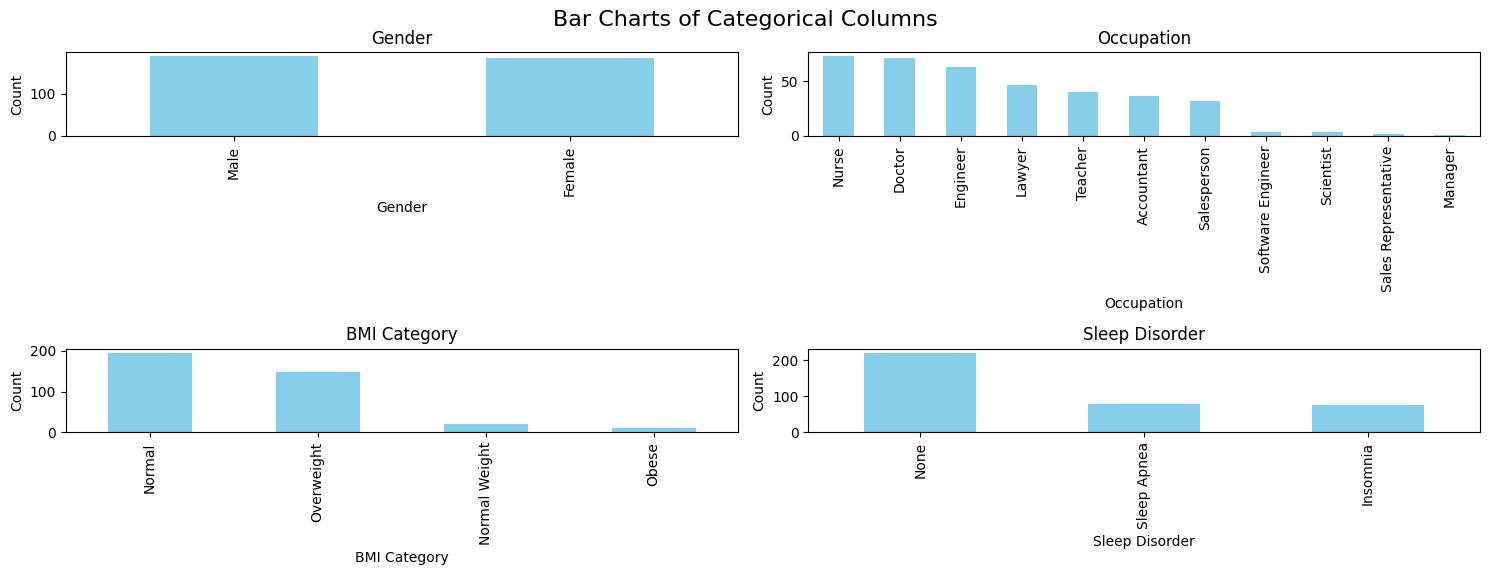

In [104]:
columns_per_row = 2
rows = 2
num_columns = len(df_char.columns)

#subplots
fig, axes = plt.subplots(nrows=rows, ncols=columns_per_row, figsize=(15, 6))

axes = axes.flatten()
for i, column in enumerate(df_char.columns):
    df_char[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

for i in range(num_columns, rows * columns_per_row):
    fig.delaxes(axes[i])

plt.suptitle('Bar Charts of Categorical Columns', y=0.95, fontsize=16)
plt.tight_layout()
plt.show()

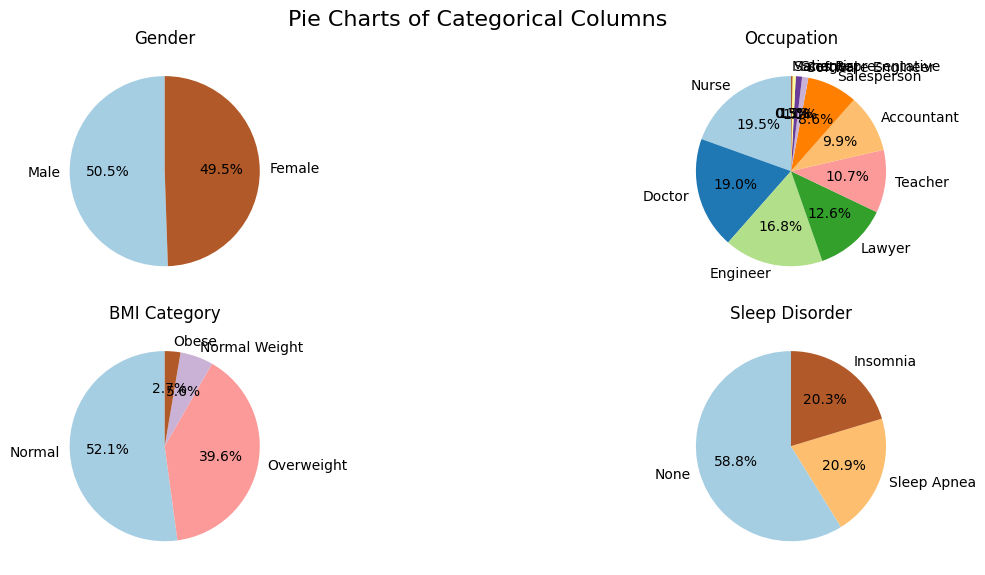

In [105]:
columns_per_row = 2
rows = 2
num_columns = len(df_char.columns)

#subplots
fig, axes = plt.subplots(nrows=rows, ncols=columns_per_row, figsize=(15, 6))

axes = axes.flatten()
for i, column in enumerate(df_char.columns):
    #occurrences of each category
    category_counts = df_char[column].value_counts()

    #pie chart
    category_counts.plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90, colormap='Paired')
    axes[i].set_title(f'{column}')
    axes[i].set_ylabel('')  # Remove the y-axis label

for i in range(num_columns, rows * columns_per_row):
    fig.delaxes(axes[i])

plt.suptitle('Pie Charts of Categorical Columns', y=0.95, fontsize=16)
plt.tight_layout()
plt.show()

## Feature Encoding
Converting all categorical columns to numeric

In [106]:
df2 = df.copy()

In [107]:
from sklearn import preprocessing

label_encoding={}
for col in df2.select_dtypes(include=["object"]).columns:
    label_encoding[col] = preprocessing.LabelEncoder()
    df2[col] = label_encoding[col].fit_transform(df2[col])
    label =dict(zip(label_encoding[col].classes_, label_encoding[col].transform(label_encoding[col].classes_)))
    print(f"{col}: ",label)

Gender:  {'Female': 0, 'Male': 1}
Occupation:  {'Accountant': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Manager': 4, 'Nurse': 5, 'Sales Representative': 6, 'Salesperson': 7, 'Scientist': 8, 'Software Engineer': 9, 'Teacher': 10}
BMI Category:  {'Normal': 0, 'Normal Weight': 1, 'Obese': 2, 'Overweight': 3}
Sleep Disorder:  {'Insomnia': 0, 'None': 1, 'Sleep Apnea': 2}


In [108]:
df2.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,27,9,6.1,6,42,6,3,77.0,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75.0,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75.0,10000,1,125,80
3,1,28,6,5.9,4,30,8,2,78.0,3000,2,140,90
4,1,28,6,5.9,4,30,8,2,78.0,3000,2,140,90


# Prediction Model
### Classification Task
For the numeric prediction model, we aim to predict the 'Sleep Disorder' feature.

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [110]:
input_df = df2.drop("Sleep Disorder",axis=1)
output_df = df2['Sleep Disorder']

BMI Category:  {'Normal': 0, 'Normal Weight': 1, 'Obese': 2, 'Overweight': 3}

## Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
#test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=0)
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train, y_train)
y_predict = DT_model.predict(x_test)

In [113]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.93      0.95      0.94        42
           2       0.86      0.86      0.86        14

    accuracy                           0.89        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.89      0.89      0.89        75



In [114]:
#test_size=0.3
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.3, random_state=0)
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train, y_train)
y_predict = DT_model.predict(x_test)

In [115]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.92      0.90      0.91        67
           2       0.80      0.83      0.82        24

    accuracy                           0.87       113
   macro avg       0.84      0.85      0.84       113
weighted avg       0.87      0.87      0.87       113



Conclusion: For the DecisionTreeClassifier model, splitting the testing set by 20% can yield the highest accuracy

### Tunning Parameters
The displayed parameters in the tuning code below are only those whose tuned values differ from the default settings. In essence, all parameters have been tested, but only the ones with changes are shown.

In [116]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=0)
parameters = {
'criterion': ['gini', 'entropy'],
'max_depth': [2, 4, 6, 8],
'min_samples_split':[2,4,6,8],
'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.5],
}
tree_model = DecisionTreeClassifier()
tree_clf= GridSearchCV(tree_model,
                            param_grid = parameters,
                            scoring='accuracy',
                            cv=5)
tree_clf.fit(x_train,y_train)
print("Tuned Hyperparameters :", tree_clf.best_params_)
print("Accuracy :",tree_clf.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0}
Accuracy : 0.8996610169491526


In [117]:
DT_model = DecisionTreeClassifier(criterion= 'entropy', max_depth = 4, min_samples_split=2, min_weight_fraction_leaf = 0.0)
DT_model.fit(x_train, y_train)
y_predict = DT_model.predict(x_test)

In [118]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.93      0.95      0.94        42
           2       0.86      0.86      0.86        14

    accuracy                           0.89        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.89      0.89      0.89        75



Conclusion: After tuning, the accuracy level remains unchanged compared to a test set split of 0.2

## Naive Bayes
The displayed parameters in the tuning code below are only those whose tuned values differ from the default settings. In essence, all parameters have been tested, but only the ones with changes are shown.

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
#test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=0)
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)
y_predict = naive_model.predict(x_test)

In [121]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.93      0.90      0.92        42
           2       0.86      0.86      0.86        14

    accuracy                           0.87        75
   macro avg       0.84      0.85      0.85        75
weighted avg       0.87      0.87      0.87        75



In [122]:
#test_size=0.3
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.3, random_state=0)
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)
y_predict = naive_model.predict(x_test)

In [123]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.67      0.82      0.73        22
           1       0.92      0.90      0.91        67
           2       0.90      0.79      0.84        24

    accuracy                           0.86       113
   macro avg       0.83      0.84      0.83       113
weighted avg       0.87      0.86      0.86       113



Conclusion: For the NaiveBayes model, splitting the testing set by 20% can yield the highest accuracy.

### Tunning Parameters

In [124]:
params = naive_model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

priors: None
var_smoothing: 1e-09


In [125]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=0)

parameters = {
    'priors': [None, [0.25, 0.25, 0.5]],
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
naive_model = GaussianNB()
naive_clf= GridSearchCV(naive_model,
                            param_grid = parameters,
                            scoring='accuracy',
                            cv=5)
naive_clf.fit(x_train,y_train)
print("Tuned Hyperparameters :", naive_clf.best_params_)
print("Accuracy :",naive_clf.best_score_)


Tuned Hyperparameters : {'priors': None, 'var_smoothing': 1e-09}
Accuracy : 0.8797175141242939


Conclusion: the default setting parameters are already the best, so no need to do tunning

### KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
#testing the best n for test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=0)
error_rate=[]
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)

    error_rate.append(np.mean(y_predict != y_test))

best_n_index = np.argmin(error_rate)
best_n = best_n_index+1

print(f"Best n: {best_n} with error rate: {error_rate[best_n_index]}")

Best n: 1 with error rate: 0.10666666666666667


In [128]:
#testing the best n for test_size=0.3
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.3, random_state=0)
error_rate=[]
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)

    error_rate.append(np.mean(y_predict != y_test))

best_n_index = np.argmin(error_rate)
best_n = best_n+1

print(f"Best n: {best_n} with error rate: {error_rate[best_n_index]}")

Best n: 2 with error rate: 0.1415929203539823


Based on the looping results, the value of n: 2 with the testing set divided by 20% can yield the lowest error values.

In [129]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=0)
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_predict = knn_model.predict(x_test)

In [130]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.93      0.88      0.90        42
           2       0.69      0.79      0.73        14

    accuracy                           0.83        75
   macro avg       0.78      0.80      0.79        75
weighted avg       0.83      0.83      0.83        75



### Tunning Parameters
The displayed parameters in the tuning code below are only those whose tuned values differ from the default settings. In essence, all parameters have been tested, but only the ones with changes are shown.

In [131]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=0)
parameters = {
'p': [1,2,3,4,5,6],
}
knn_model = KNeighborsClassifier()
knn_clf= GridSearchCV(knn_model,
                            param_grid = parameters,
                            scoring='accuracy',
                            cv=5)
knn_clf.fit(x_train,y_train)
print("Tuned Hyperparameters :", knn_clf.best_params_)
print("Accuracy :",knn_clf.best_score_)

Tuned Hyperparameters : {'p': 1}
Accuracy : 0.8629378531073447


In [132]:
knn_model = KNeighborsClassifier(p= 1, n_neighbors=2)
knn_model.fit(x_train, y_train)
y_predict = knn_model.predict(x_test)

In [133]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.93      0.95      0.94        42
           2       0.91      0.71      0.80        14

    accuracy                           0.88        75
   macro avg       0.87      0.84      0.85        75
weighted avg       0.88      0.88      0.88        75



Conclusion: the accuracy increased from 0.84 to 0.88

### Binary/Multinomial Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
#test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=0)
LogRegMul_model = LogisticRegression(multi_class='multinomial')
LogRegMul_model.fit(x_train, y_train)
y_predict=LogRegMul_model.predict(x_test)

In [136]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.82      0.95      0.88        42
           2       1.00      0.71      0.83        14

    accuracy                           0.84        75
   macro avg       0.88      0.78      0.82        75
weighted avg       0.85      0.84      0.84        75



In [137]:
#test_size=0.3
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.3, random_state=0)
LogRegMul_model = LogisticRegression(multi_class='multinomial')
LogRegMul_model.fit(x_train, y_train)
y_predict=LogRegMul_model.predict(x_test)

In [138]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.90      0.94      0.92        67
           2       0.95      0.75      0.84        24

    accuracy                           0.87       113
   macro avg       0.85      0.82      0.83       113
weighted avg       0.87      0.87      0.87       113



Conclusion: For the Multinomial Logistic Regression model, splitting the testing set by 30% can result in higher accuracy.

### Tuning Parameters
The displayed parameters in the tuning code below are only those whose tuned values differ from the default settings. In essence, all parameters have been tested, but only the ones with changes are shown.

In [139]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.3, random_state=0)
parameters = {
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 300,400,500],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'warm_start': [True, False]
}
LogRegMul_model = LogisticRegression(multi_class='multinomial')
LogRegMul_cld= GridSearchCV(LogRegMul_model,
                            param_grid = parameters,
                            scoring='accuracy',
                            cv=5)
LogRegMul_cld.fit(x_train,y_train)
print("Tuned Hyperparameters :", LogRegMul_cld.best_params_)
print("Accuracy :",LogRegMul_cld.best_score_)

Tuned Hyperparameters : {'fit_intercept': True, 'max_iter': 500, 'penalty': 'none', 'warm_start': True}
Accuracy : 0.8886792452830189


In [140]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.3, random_state=0)
LogRegMul_model = LogisticRegression(multi_class='multinomial', fit_intercept= False, max_iter= 500,penalty= 'l2', warm_start=True)
LogRegMul_model.fit(x_train, y_train)
y_predict = LogRegMul_model.predict(x_test)

In [141]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.92      0.91      0.92        67
           2       0.86      0.79      0.83        24

    accuracy                           0.87       113
   macro avg       0.84      0.84      0.84       113
weighted avg       0.87      0.87      0.87       113



Conclusion: After tuning, the accuracy level remains unchanged compared to a test set split of 0.3

## ADA BOOST

In [142]:
from sklearn.ensemble import AdaBoostClassifier

In [143]:
#test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=0)
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(x_train, y_train)
y_predict=adaboost_model.predict(x_test)

In [144]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.69      0.47      0.56        19
           1       0.82      0.95      0.88        42
           2       0.85      0.79      0.81        14

    accuracy                           0.80        75
   macro avg       0.78      0.74      0.75        75
weighted avg       0.79      0.80      0.79        75



In [145]:
#test_size=0.3
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.3, random_state=0)
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(x_train, y_train)
y_predict=adaboost_model.predict(x_test)

In [146]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.55      0.50      0.52        22
           1       0.83      0.90      0.86        67
           2       0.90      0.79      0.84        24

    accuracy                           0.80       113
   macro avg       0.76      0.73      0.74       113
weighted avg       0.79      0.80      0.79       113



Conclusion: Both sets have equal accuracy rate

### Tunning parameters

In [147]:
parameters = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'n_estimators': [50, 100, 200],
}
adaboost_model = AdaBoostClassifier()
adaboost_clf= GridSearchCV(adaboost_model,
                            param_grid = parameters,
                            scoring='accuracy',
                            cv=5)
adaboost_clf.fit(x_train,y_train)
print("Tuned Hyperparameters :", adaboost_clf.best_params_)
print("Accuracy :",adaboost_clf.best_score_)

Tuned Hyperparameters : {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}
Accuracy : 0.8886792452830189


### ADABoost with Decision Tree

In [148]:
base_estimator1 = DecisionTreeClassifier(criterion= 'entropy', max_depth = 4, min_samples_split=8, min_weight_fraction_leaf = 0.0)
ADABoost_class1 = AdaBoostClassifier(base_estimator=base_estimator1, n_estimators=100, algorithm= 'SAMME', learning_rate= 0.1)
ADABoost_class1.fit(x_train, y_train)
y_predict=ADABoost_class1.predict(x_test)

In [149]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.93      0.97      0.95        67
           2       0.91      0.83      0.87        24

    accuracy                           0.91       113
   macro avg       0.90      0.87      0.89       113
weighted avg       0.91      0.91      0.91       113



Conclusion: the accuracy rate increased from 0.89(the highest accuracy rate from 20% testing set decision tree) to 0.91

### ADABoost with Multinomial Regression

In [150]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.3, random_state=0)
base_estimator2 = LogisticRegression(multi_class='multinomial', fit_intercept= False, max_iter= 500,penalty= 'none', warm_start=True)
ADABoost_class1 = AdaBoostClassifier(base_estimator=base_estimator2, n_estimators=100, algorithm= 'SAMME', learning_rate= 0.1)
ADABoost_class1.fit(x_train, y_train)
y_predict=ADABoost_class1.predict(x_test)

In [151]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        22
           1       0.91      0.91      0.91        67
           2       0.79      0.79      0.79        24

    accuracy                           0.85       113
   macro avg       0.81      0.81      0.81       113
weighted avg       0.85      0.85      0.85       113



Conclusion: The accuracy level remains unchanged compared to a test set multinomial regression above

## Stacking

In [152]:
from sklearn.ensemble import StackingClassifier

In [153]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=0)
estimators = [
    ('knn',  KNeighborsClassifier(p= 1, n_neighbors=2)),
    ('svr2', LogisticRegression(multi_class='multinomial', fit_intercept= False, max_iter= 500,penalty= 'none', warm_start=True)),
    ('gnb', GaussianNB()),
    ('dt', DecisionTreeClassifier(criterion= 'entropy', max_depth = 4, min_samples_split=8, min_weight_fraction_leaf = 0.0))
]

stacking_class1 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_class1.fit(x_train, y_train)
y_predict=stacking_class1.predict(x_test)

In [154]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1','2']))


Classification Report

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.93      0.95      0.94        42
           2       0.86      0.86      0.86        14

    accuracy                           0.89        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.89      0.89      0.89        75



Final Conclusion: Among all models, AdaBoost with decision tree provides the highest accuracy, which is 91%